In [1]:
import sys
sys.path.append("../")

from rbm import fasta_read, get_checkpoint, get_beta_and_W, all_weights, RBM
import analysis_methods as am
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import subprocess as sp
import matplotlib.image as mpimg

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [2]:
# Directory of Stored RBMs
mdir = "/mnt/D1/globus/pig_trained_rbms/"
rounds = ["b3", "n1", "np1", "np2", "np3"]
c1_rounds = [x+"_c1" for x in rounds]
c2_rounds = [x+"_c2" for x in rounds]

In [4]:
# Methods for generating plots etc.
def assign(x):
    if x < 2:
        return "Low"
    elif x < 10:
        return "Mid"
    else:
        return "High"


# Stores all data in a dictionary ("data")
data_c1 = am.fetch_data(c1_rounds, dir="../../pig_tissue", counts=True, assignment_function=assign)

Process Time 0.6547093391418457
Process Time 1.17258620262146
Process Time 1.3659753799438477
Process Time 0.4710381031036377
Process Time 0.995375394821167


In [5]:
# generate weights in respective
for rid, round in enumerate(c1_rounds):
    # if rid > 0:
    #     break
    checkp, version_dir = am.get_checkpoint_path(round, rbmdir=mdir)
    tmp = RBM.load_from_checkpoint(checkp)
    all_weights(tmp, version_dir +round+"_weights", 5, 1, 6, 2, "protein")

/home/jonah/PycharmProjects/phage_display_ML/rbm_torch/rbm_utils.py:297: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xticks, xtickslabels)


<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

<Figure size 432x720 with 0 Axes>

In [5]:
# Generate Sequence Logo for Each round
for r in c1_rounds:
    am.seq_logo(data_c1[data_c1["round"] == r], f"{r}_seqlogo", weight=False, outdir="./generated/")
    am.seq_logo(data_c1[data_c1["round"] == r], f"{r}_w_seqlogo", weight=True, outdir="./generated/")

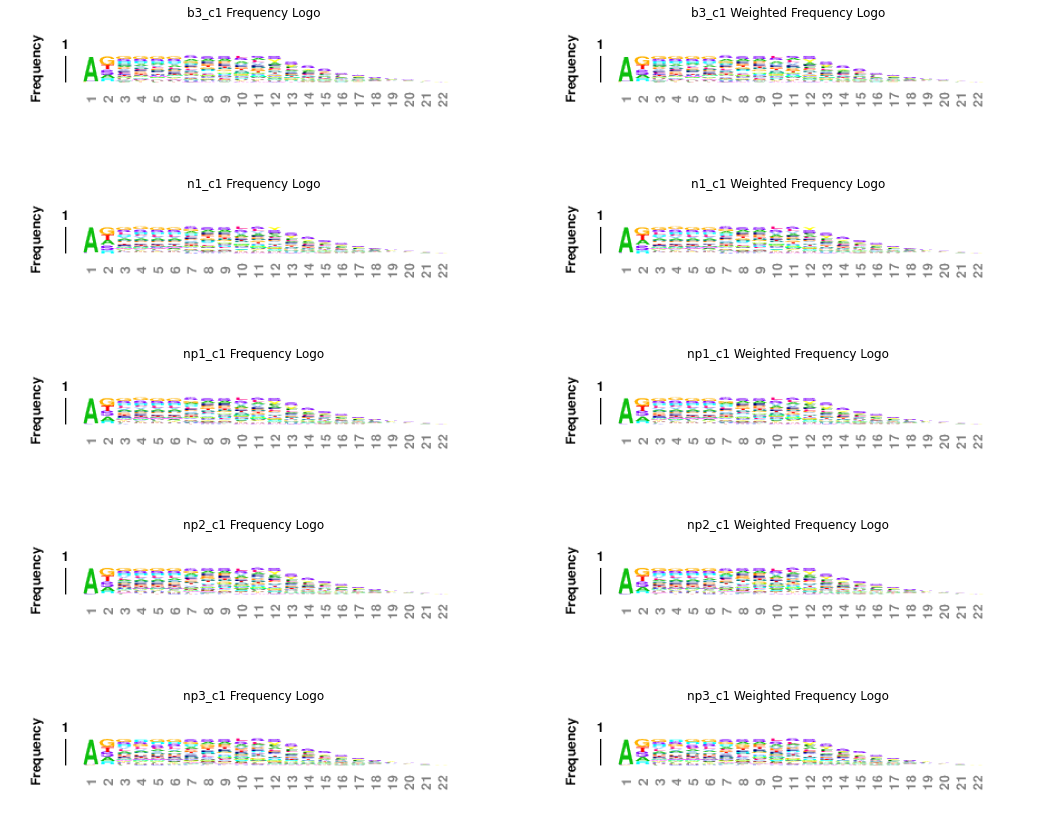

In [18]:
# Seq Logo showing Frequency of Each Amino Acid at each position

fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)
seqdir = "../pig_tissue/seqlogos/"
plt.tight_layout()
for rid, r in enumerate(c1_rounds):
    img1 = mpimg.imread(f"{seqdir}{r}_seqlogo.freq.png")
    img2 = mpimg.imread(f"{seqdir}{r}_w_seqlogo.freq.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Frequency Logo")
    axs[rid][1].set_title(f"{r} Weighted Frequency Logo")

# plt.axis('off')
plt.show()

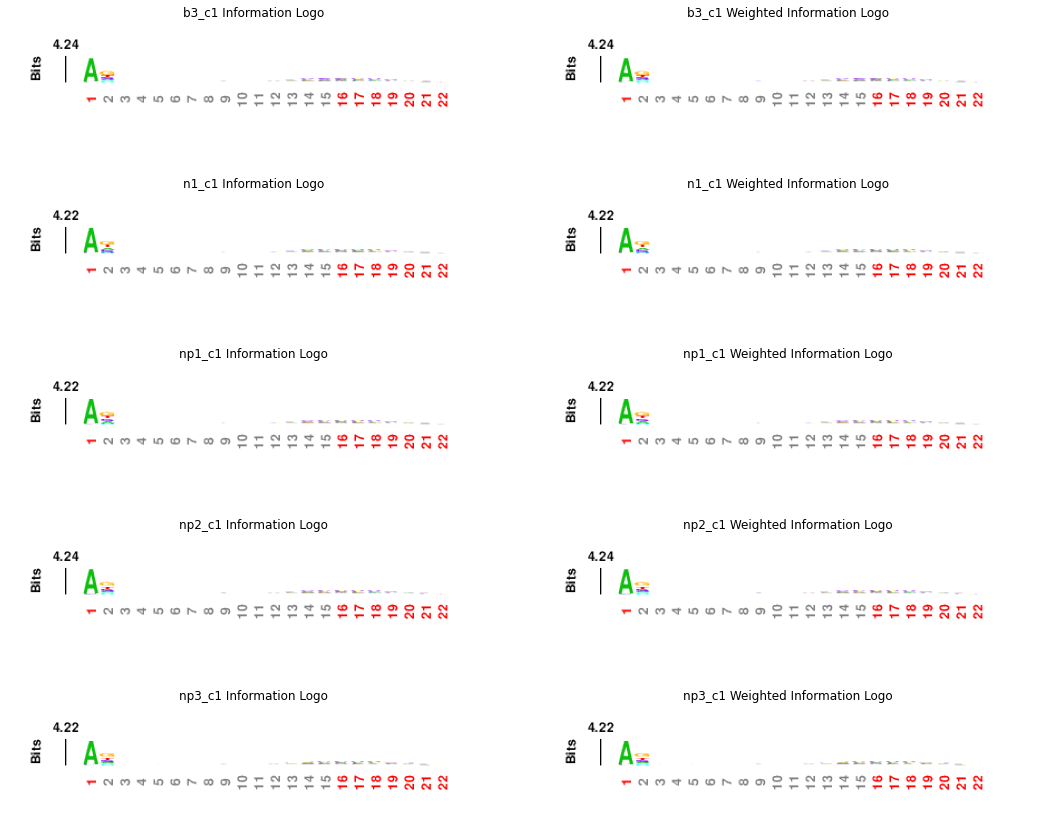

In [20]:
# Seq Logo showing Information of Each Amino Acid at each position

fig, axs = plt.subplots(5, 2)
fig.set_size_inches(15, 12)
seqdir = "../pig_tissue/seqlogos/"
plt.tight_layout()
for rid, r in enumerate(c1_rounds):
    img1 = mpimg.imread(f"{seqdir}{r}_seqlogo.info.png")
    img2 = mpimg.imread(f"{seqdir}{r}_w_seqlogo.info.png")
    axs[rid][0].imshow(img1)
    axs[rid][1].imshow(img2)
    axs[rid][0].axis("off")
    axs[rid][1].axis("off")
    axs[rid][0].set_title(f"{r} Information Logo")
    axs[rid][1].set_title(f"{r} Weighted Information Logo")

# plt.axis('off')
plt.show()

In [7]:
def count_dist(data_w_counts, title):
    fig, axs = plt.subplots(2, 1)
    # sns.histplot(data_w_counts, ax=axs[0], x="round", hue="assignment", multiple="fill", palette="rocket", stat="percent")
    sns.histplot(data_w_counts, ax=axs[1], x="round", hue="assignment", multiple="stack", palette="rocket", stat="count")
    # sns.barplot(data=data_w_counts, ax=axs[0], x="round", y="copynum")
    plt.suptitle(title)
    plt.show()

# count_dist(all_data, "Unique Sequence Count Distribution")

count_dist(data_c1, "Unique Sequence Count Distribution C1")
# Low count == 1, Med count < 10, High count >= 10

ValueError: cannot set using a list-like indexer with a different length than the value

In [8]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("np3_c1", rbmdir=mdir)
np3_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(c1_rounds, np3_rbm, data_c1, "np3_v0_all")

In [9]:
np3_likelihoods = am.get_likelihoods("./generated/np3_v0_all.json")

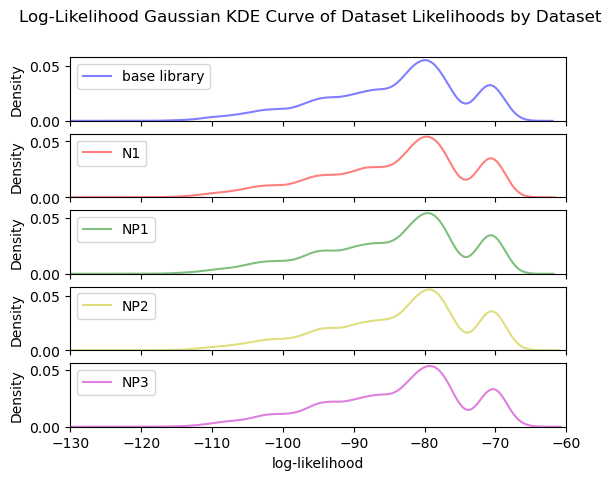

In [12]:
# Plot Likelihoods of Each batch of Data
am.plot_likelihoods(np3_likelihoods["likelihoods"], c1_rounds, ["base library", "N1", "NP1", "NP2", "NP3"], xlim=(-130, -60), cdf=False)

In [13]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("b3_c1", rbmdir=mdir)
b3_rbm = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(c1_rounds, b3_rbm, data_c1, "b3_v0_all")

In [14]:
b3_likelihoods = am.get_likelihoods("./generated/b3_v0_all.json")

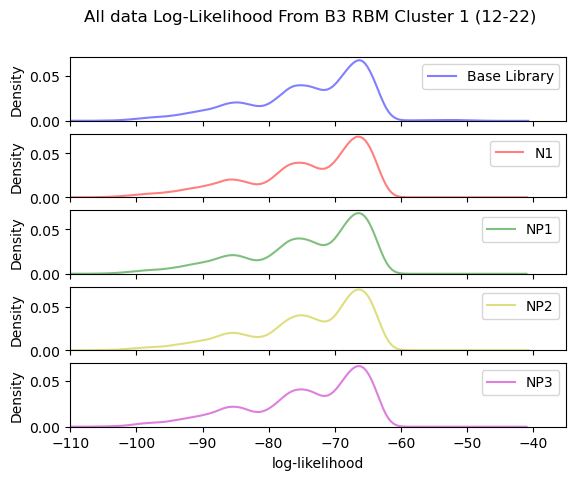

In [15]:
# assign likelihoods in new pd dataframe
b3_title = "All data Log-Likelihood From B3 RBM Cluster 1 (12-22)"
# Plot Likelihood Distributions
am.plot_likelihoods(b3_likelihoods["likelihoods"], c1_rounds, ["Base Library", "N1", "NP1", "NP2", "NP3"], title=b3_title, cdf=False, xlim=(-110, -35))

In [25]:
# find in common sequences
common = data["b3_c1"].merge(data["np3_c1"], on=['sequence'])
print("Common Sequences b3 & np3", common.shape[0])
common = data["b3_c1"].merge(data["np2_c1"], on=['sequence'])
print("Common Sequences b3 & np2", common.shape[0])
common = data["b3_c1"].merge(data["np1_c1"], on=['sequence'])
print("Common Sequences b3 & np1", common.shape[0])
common = data["b3_c1"].merge(data["n1_c1"], on=['sequence'])
print("Common Sequences b3 & n1", common.shape[0])

# All together
common = data["b3_c1"].merge(data["np3_c1"], on=['sequence'])
common1 = common.merge(data["np2_c1"])
common2 = common1.merge(data["np1_c1"])
common3 = common2.merge(data["n1_c1"])
common4 = data["np1_c1"].merge(data["np2_c1"].merge(data["np3_c1"]))
common5 = common4.merge(data["n1_c1"])
print("Common Sequences b3 & np3", common.shape[0])
print("Common Sequences b3 & np3 & np2", common1.shape[0])
print("Common Sequences b3 & np3 & np2 & np1", common2.shape[0])
print("Common Sequences b3 & np3 & np2 & np1 & n1", common3.shape[0])
print("Common Sequences np3 & np2 & np1 & n1", common5.shape[0])
print("Common Sequences np3 & np2 & np1", common4.shape[0])

Common Sequences b3 & np3 22794
Common Sequences b3 & np2 15037
Common Sequences b3 & np1 26164
Common Sequences b3 & n1 22417
Common Sequences b3 & np3 22794
Common Sequences b3 & np3 & np2 9895
Common Sequences b3 & np3 & np2 & np1 7376
Common Sequences b3 & np3 & np2 & np1 & n1 4443
Common Sequences np3 & np2 & np1 & n1 9894
Common Sequences np3 & np2 & np1 21806


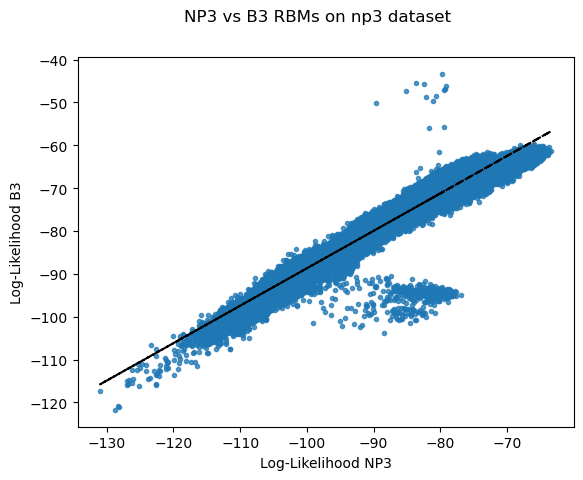

In [16]:
am.compare_likelihood_correlation(np3_likelihoods["likelihoods"]["np3_c1"], b3_likelihoods["likelihoods"]["np3_c1"], "NP3 vs B3 RBMs on np3 dataset", ["NP3", "B3"])

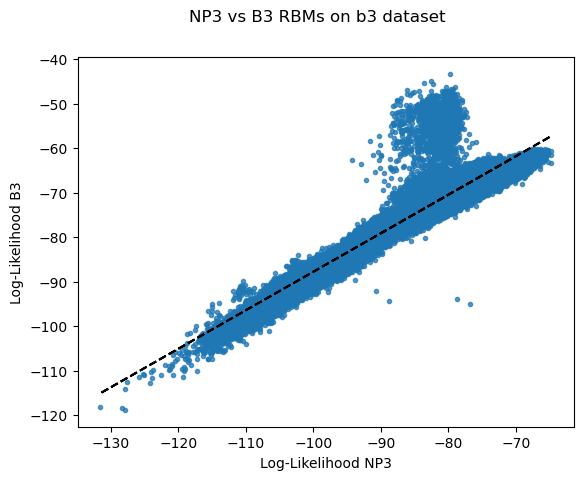

In [17]:
am.compare_likelihood_correlation(np3_likelihoods["likelihoods"]["b3_c1"], b3_likelihoods["likelihoods"]["b3_c1"], "NP3 vs B3 RBMs on b3 dataset", ["NP3", "B3"])

## Weighted RBMS

In [18]:
# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("b3_c1_w", rbmdir=mdir)
b3_rbm_w = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(c1_rounds, b3_rbm_w, data_c1, "b3_c1_w_all")

# calculate likelihoods from last round rbm only
checkp, v_dir = am.get_checkpoint_path("np3_c1_w", rbmdir=mdir)
np3_rbm_w = RBM.load_from_checkpoint(checkp)

# this takes awhile, might be something I optimize further in the future
am.generate_likelihoods(c1_rounds, np3_rbm_w, data_c1, "np3_c1_w_all")

In [20]:
b3_w_likelihoods = am.get_likelihoods("./generated/b3_c1_w_all.json")
np3_w_likelihoods = am.get_likelihoods("./generated/np3_c1_w_all.json")

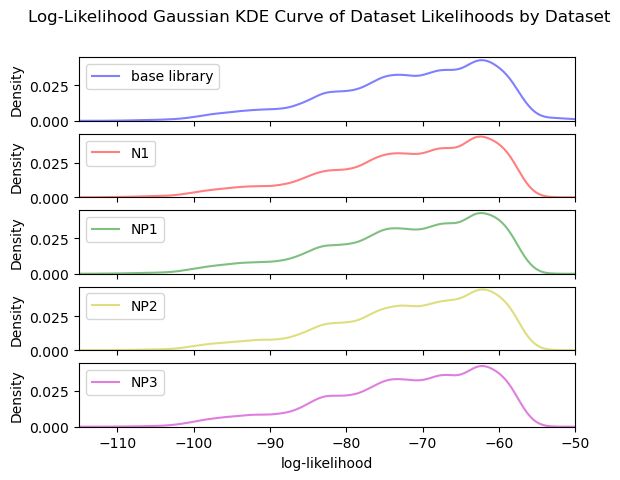

In [21]:
# Plot Likelihood Distributions
am.plot_likelihoods(b3_w_likelihoods["likelihoods"], c1_rounds, ["base library", "N1", "NP1", "NP2", "NP3"], xlim=(-115, -50), cdf=False)

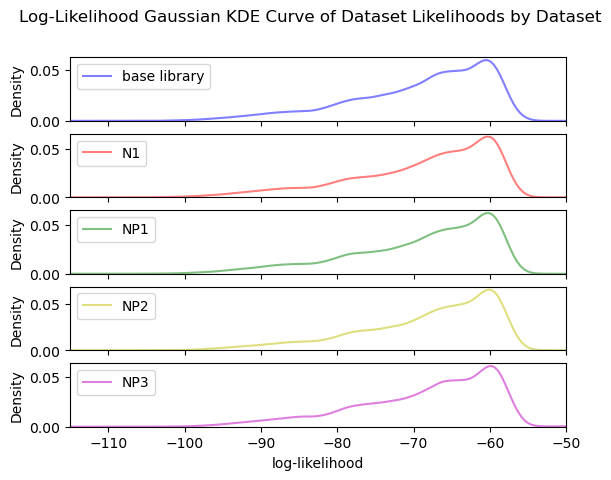

In [22]:
# Plot Likelihoods of Each batch of Data
am.plot_likelihoods(np3_w_likelihoods["likelihoods"], c1_rounds, ["base library", "N1", "NP1", "NP2", "NP3"], xlim=(-115, -50), cdf=False)

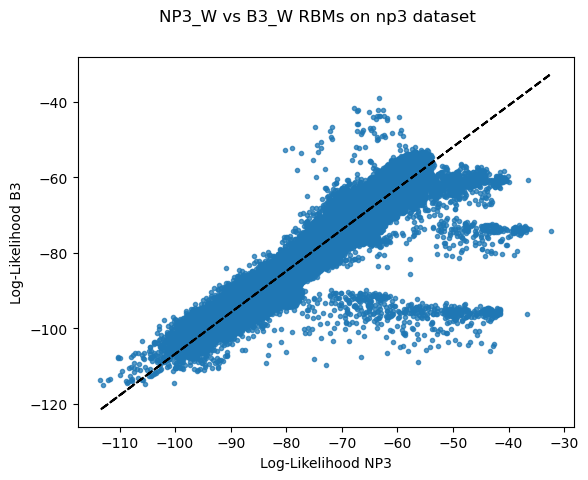

In [23]:
am.compare_likelihood_correlation(np3_w_likelihoods["likelihoods"]["np3_c1"], b3_w_likelihoods["likelihoods"]["np3_c1"], "NP3_W vs B3_W RBMs on np3 dataset", ["NP3", "B3"])

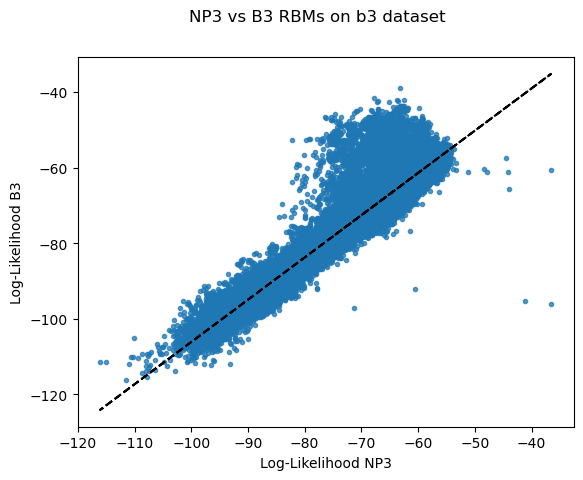

In [24]:
am.compare_likelihood_correlation(np3_w_likelihoods["likelihoods"]["b3_c1"], b3_w_likelihoods["likelihoods"]["b3_c1"], "NP3 vs B3 RBMs on b3 dataset", ["NP3", "B3"])